In [ ]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
import time
#from IPython.display import Image 

In [ ]:
############################### PART 2 ###############################
# -----------------------------Question 1-----------------------------
def boxfilter(n):
  # If remainder is 0, then condition is false, error should be thrown 
  assert(n%2 != 0), "Dimension must be odd"

  # It is a nxn 2D array with 1s
  # Then, divide by n^2 to sum up all the elements to 1
  filter = np.ones((n,n))/(n*n)

  # Return a numpy array
  return np.asarray(filter)


In [ ]:
boxfilter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [ ]:
boxfilter(4)

AssertionError: ignored

In [ ]:
boxfilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [ ]:
# -----------------------------Question 2-----------------------------
def found_up_odd(x):
  # It takes the current value and finds the next odd number
  # (11.6 -> 13) OR (2 -> 3) OR (4.3 -> 5)
  return np.ceil(x) // 2 * 2 + 1

def gauss1d(sigma):
  # Find length of the filter by finding the next odd number
  length = found_up_odd(6*sigma)
  # Magnitude of the smallest and biggest elements in the distance array
  boundary = int(length/2)

  # Array represents the different x values according to distance to center
  # It goes from -boundary to +boundary
  dist_arr = np.arange(-boundary, boundary+1)

  # Applying the given density function
  gauss_filter = np.exp(-np.square(dist_arr)/(2*np.square(sigma)))

  # Normalize the array elements
  gauss_filter = 1.0/np.sum(gauss_filter)*gauss_filter

  return gauss_filter

In [ ]:
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [ ]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [ ]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [ ]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

In [ ]:
# -----------------------------Question 3-----------------------------
def gauss2d(sigma):
  gauss2d_arr = gauss1d(sigma)[np.newaxis]

  gauss2d_filter = signal.convolve2d(gauss2d_arr, np.transpose(gauss2d_arr))

  return gauss2d_filter

In [ ]:
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [ ]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

In [ ]:
# -----------------------------Question 4a-----------------------------
def convolve2d_manual(array, filter):
  # Initialize resulting image
  img_result = np.zeros((array.shape[0], array.shape[1]))

  # Decide the number of rows,columns for padding by using filter length
  pad_len = int((filter.shape[0]-1)/2)
  padded_arr = np.pad(array, ((pad_len, pad_len), (pad_len,pad_len)), mode='constant', constant_values=0.0)

  # Since Convolution includes subtraction, this means that the filter is rotated 180 degree
  # So, if we rotate the filter, we can apply Correlation
  filter = np.rot90(filter, 2)

  # Apply the convolution formula
  # For every pixel in the resulting image
  for x in range(img_result.shape[0]):
    for y in range(img_result.shape[1]):
      
      # Find the area that has the same dimensions as the filter
      # We can put the filter directly on this area, and sum the result
      area = padded_arr[x:x+filter.shape[0], y:y+filter.shape[1]]

      # Perform the entrywise multiplication
      area_filtered = np.multiply(area, filter)

      # Sum all the values inside the filtered area
      value = np.sum(area_filtered)
      img_result[x,y] = value

  return img_result

In [ ]:
# -----------------------------Question 4b-----------------------------
def gaussconvolve2d_manual(array,sigma):
  # Produce a 2D filter according to a given sigma
  gauss2d_filter = gauss2d(sigma)
  # Convolve the array with the produced filter
  return convolve2d_manual(array, gauss2d_filter)

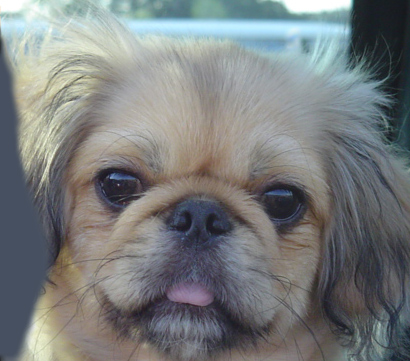

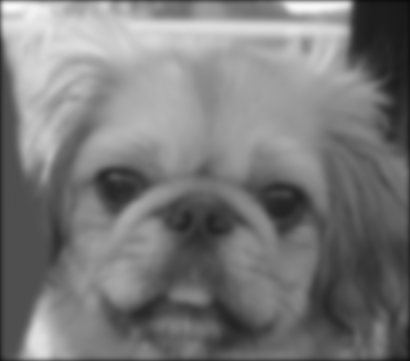

In [ ]:
# -----------------------------Question 4c-----------------------------

# Upload the original image
dog_img = Image.open('dog.jpeg')
display(dog_img)

# Convert the image to a black and white "luminance" greyscale image
dog_grey = dog_img.convert('L')
# Convert the image to a numpy array (for subsequent processing)
dog_grey_array = np.asarray(dog_grey)

# Apply the filter
dog_filtered = gaussconvolve2d_manual(dog_grey_array, 3)

# Convert filtered dog image to uint8 and then to a PIL image and save
dog_result = Image.fromarray(dog_filtered.astype('uint8'))
dog_result.save('dog4c.png','png')

# -----------------------------Question 4d-----------------------------
# Display the resulting image
dog_result_img = Image.open('dog4c.png')
display(dog_result_img)

In [ ]:
# -----------------------------Question 5a-----------------------------
def gaussconvolve2d_scipy(array,sigma):
  # Produce a 2D filter according to a given sigma
  gauss2d_filter = gauss2d(sigma)
  # Convolve the array (with pre-defined function) with the produced filter
  return signal.convolve2d(array,gauss2d_filter,'same')

Convolution and Correlation are different operations. To use correlation instead of convolution, we should rotate the filter 180 degrees. If the filter is symmetric, then both correlation and convolution will produce the same results. However, if the filter is not symmetric, then both operations will produce different outputs. That's why, signal.convolve2d and signal.correlate2d functions employ different formulas.

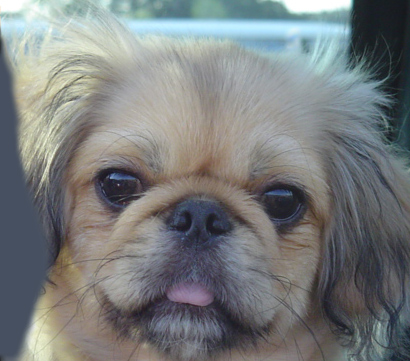

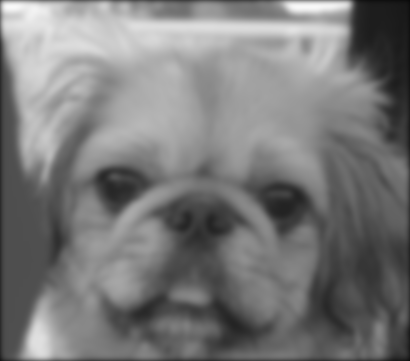

In [ ]:
# -----------------------------Question 5b-----------------------------

# Apply the filter
dog_filtered_scipy = gaussconvolve2d_scipy(dog_grey_array, 3)

# Convert filtered dog image to uint8 and then to a PIL image and save
dog_result_scipy = Image.fromarray(dog_filtered_scipy.astype('uint8'))
dog_result_scipy.save('dog5b.png','png')

# -----------------------------Question 5c-----------------------------
# Display the resulting image
dog_result_img_scipy = Image.open('dog5b.png')
display(dog_img)
display(dog_result_img_scipy)

In [ ]:
# -----------------------------Question 6-----------------------------

# Manual filtering duration
t1 = time.time() # start timestamp
filtering_manual = gaussconvolve2d_manual(dog_grey_array, 10)
duration_manual = time.time() - t1 # duration in seconds
print("Manual filtering duration:", duration_manual)

# Scipy filtering duration
t2 = time.time() # start timestamp
filtering_scipy = gaussconvolve2d_scipy(dog_grey_array, 10)
duration_scipy = time.time() - t2 # duration in seconds
print("Scipy filtering duration:", duration_scipy)

Manual filtering duration: 2.964763641357422
Scipy filtering duration: 1.7315092086791992


gaussconvolve2d_scipy is faster than the gaussconvolve2d_manual. Both gaussconvolve2d_manual and gaussconvolve2d_scipy use the same filter and this filter is produced by using the separability feature of the Gaussian filters. So, the time difference cannot be a result of producing or employing the filter. Thus, the time difference should be a result of process differences of applying the filter. In gaussconvolve2d_scipy, we are using signal.convolve2d and in gaussconvolve2d_manual, we are using convolve2d_manual. signal.convolve2d performs the same operation faster probably because of the implementation. It can use inner products or Fourier transform to fasten the process.

In [ ]:
# -----------------------------Question 7-----------------------------

*   Convolving an image with a 2D Gaussian filter will yield O(m^2 x n^2) complexity. Because for each pixel (X,Y), there are m x m multiplications, and there are n x n pixels in total. 
*   By using the separability property of 2D Gaussian filters, we can represent the filter as the product of two 1D dimensional vectors. Because an m x m filter is the result of outer product of one (1 x m) and one (m x 1) vectors. 


*   As a result, we can first concolve each row of the image with the first 1D filter. Then, we can convolve the each column of the image with the other 1D filter. And the result will be the same with the previous operation. 
*   If we employ separability, when for each pixel (X,Y), there are 2m multiplications, and there are n x n pixels in total. This will yield O(2m x n^2) complexity. 


Therefore, the later implementation is much more efficent than the previous implementation especially for the large values of m.


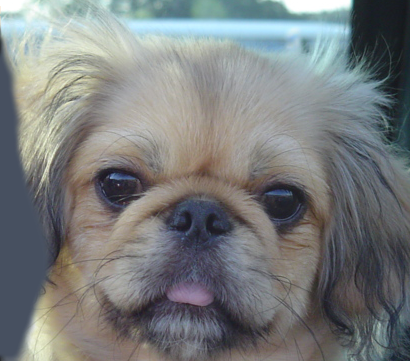

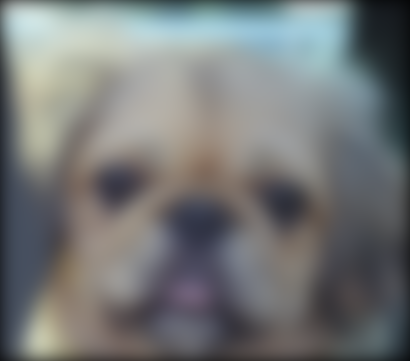

In [ ]:
############################### PART 3 ###############################
# -----------------------------Question 1-----------------------------

# Display the original image
img_0b_dog = Image.open('hw1/0b_dog.bmp')
display(img_0b_dog)

# Define the sigma value to change the level of blurring
sig = 10

# Convert the image to a float array
img_0b_dog_arr = np.asfarray(img_0b_dog)
# Shape of this array is (361, 410, 3)
# 361: number of pixel rows
# 410: number of pixel columns
# 3: 3 different array for R,G,B values

# Extract all of the channels from the image
img_r_channel = img_0b_dog_arr[:,:,0]
img_g_channel = img_0b_dog_arr[:,:,1]
img_b_channel = img_0b_dog_arr[:,:,2]

# Apply the Gaussian filter on all channels
img_r_filtered = gaussconvolve2d_scipy(img_r_channel, sig)
img_g_filtered = gaussconvolve2d_scipy(img_g_channel, sig)
img_b_filtered = gaussconvolve2d_scipy(img_b_channel, sig)

# Form the output image
img_0b_dog_filtered = np.ndarray(img_0b_dog_arr.shape)

# Merge all the filtered channels
img_0b_dog_filtered[:,:,0] = img_r_filtered
img_0b_dog_filtered[:,:,1] = img_g_filtered
img_0b_dog_filtered[:,:,2] = img_b_filtered

# Convert filtered dog image to uint8 and then to a PIL image and save
img_0b_dog_res = Image.fromarray(img_0b_dog_filtered.astype('uint8'))
img_0b_dog_res.save('0b_dog_1.png','png')

# Display the resulting image
img_0b_dog_1 = Image.open('0b_dog_1.png')
display(img_0b_dog_1)

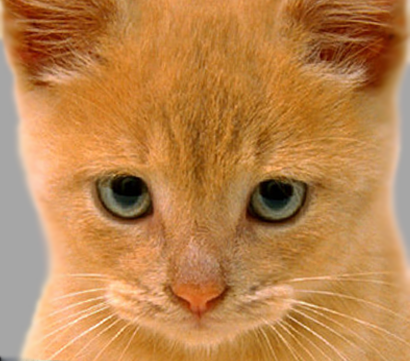

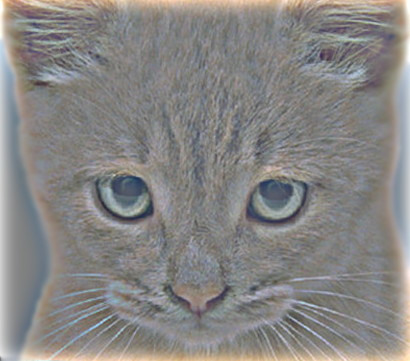

In [ ]:
# -----------------------------Question 2-----------------------------

# Display the original image
img_0a_cat = Image.open('hw1/0a_cat.bmp')
display(img_0a_cat)

# Define the same sigma value to change the level of blurring
sig = 10

# Convert the image to a float array
img_0a_cat_arr = np.asfarray(img_0a_cat)
# Shape of this array is (361, 410, 3)
# 361: number of pixel rows
# 410: number of pixel columns
# 3: 3 different array for R,G,B values

# Extract all of the channels from the image
img_r_channel = img_0a_cat_arr[:,:,0]
img_g_channel = img_0a_cat_arr[:,:,1]
img_b_channel = img_0a_cat_arr[:,:,2]

# Apply the Gaussian filter on all channels
img_r_filtered = gaussconvolve2d_scipy(img_r_channel, sig)
img_g_filtered = gaussconvolve2d_scipy(img_g_channel, sig)
img_b_filtered = gaussconvolve2d_scipy(img_b_channel, sig)

# Form the output image
img_0a_cat_filtered = np.ndarray(img_0a_cat_arr.shape)

# Merge all the filtered channels, find the low frequency version
img_0a_cat_filtered[:,:,0] = img_r_filtered
img_0a_cat_filtered[:,:,1] = img_g_filtered
img_0a_cat_filtered[:,:,2] = img_b_filtered

# Subtract the low freq version from the original to find high freq version
img_0a_cat_high = img_0a_cat_arr - img_0a_cat_filtered

# Add 128 to visualize
img_0a_cat_128 = img_0a_cat_high + 128.0
# Control the pixel ranges to be between [0,255]
img_0a_cat_128 = np.clip(img_0a_cat_128, 0.0, 255.0)

# Convert high freq cat image to uint8 and then to a PIL image and save
img_0a_cat_res = Image.fromarray(img_0a_cat_128.astype('uint8'))
img_0a_cat_res.save('0a_cat_2.png','png')

# Display the resulting image
img_0a_cat_2 = Image.open('0a_cat_2.png')
display(img_0a_cat_2)

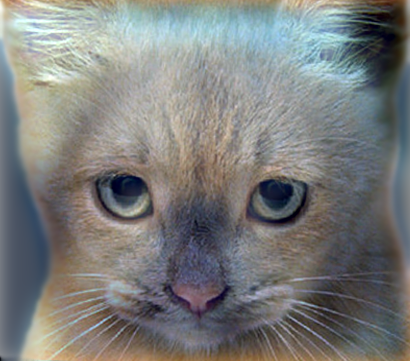

In [ ]:
# -----------------------------Question 3-----------------------------

# Add the low freq and high freq image to get hybrid image
dog_cat_hybrid = img_0b_dog_filtered + img_0a_cat_high

# Make sure the pixel values are in between [0,255]
dog_cat_hybrid = np.clip(dog_cat_hybrid, 0.0, 255.0)

# Convert hybrid image to uint8 and then to a PIL image and save
img_dog_cat_hybrid = Image.fromarray(dog_cat_hybrid.astype('uint8'))
img_dog_cat_hybrid.save('dog_cat_hybrid.png','png')

# Display the resulting image
img_0_hybrid = Image.open('dog_cat_hybrid.png')
display(img_0_hybrid)

In [ ]:
# --------------------------Question 3 Experiments--------------------------

def low_freq_img(sig, low_image):
  # Upload the original image
  img_orig = Image.open('hw1/' + low_image)

  # Convert the image to a float array
  img_arr = np.asfarray(img_orig)

  # Form the output image
  img_filtered = np.ndarray(img_arr.shape)

  for i in range(3):
    # Extract all of the channels from the image
    img_channel = img_arr[:,:,i]

    # Apply the Gaussian filter on all channels
    img_channel_filtered = gaussconvolve2d_scipy(img_channel, sig)

    # Merge all the filtered channels
    img_filtered[:,:,i] = img_channel_filtered

  return img_filtered

def high_freq_img(sig, high_image):
  # Upload the original image
  img_orig = Image.open('hw1/' + high_image)
  
  # Convert the image to a float array
  img_arr = np.asfarray(img_orig)

  # Find the low freq version of the image
  img_filtered = low_freq_img(sig,high_image)
  
  # Subtract the low freq version from the original to find high freq version
  img_res = img_arr - img_filtered

  return img_res

def hybrid_img(sig, high, low):
  # Add the low freq and high freq image to get hybrid image
  low_img = low_freq_img(sig, low)
  high_img = high_freq_img(sig, high)
  hybrid = low_img + high_img

  # Make sure the pixel values are in between [0,255]
  hybrid = np.clip(hybrid, 0.0, 255.0)

  # Convert hybrid image to uint8 and then to a PIL image and save
  img_hybrid = Image.fromarray(hybrid.astype('uint8'))
  save_path = low + '_' + high + str(sig) +'_hybrid.png'
  img_hybrid.save(save_path,'png')

  # Display the resulting image
  img_hybrid_open = Image.open(save_path)
  print('Sig:', sig, ', Low: ', low, ', High: ', high)
  display(img_hybrid_open)

Sig: 5.0 , Low:  1b_motorcycle.bmp , High:  1a_bicycle.bmp


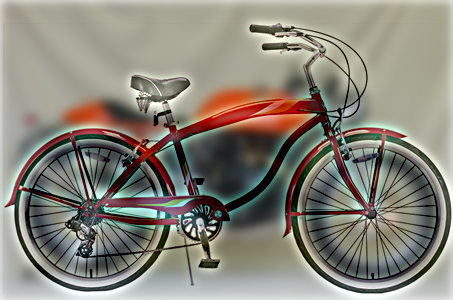

Sig: 10.0 , Low:  1b_motorcycle.bmp , High:  1a_bicycle.bmp


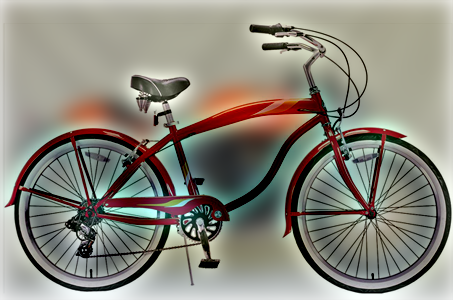

Sig: 15.0 , Low:  1b_motorcycle.bmp , High:  1a_bicycle.bmp


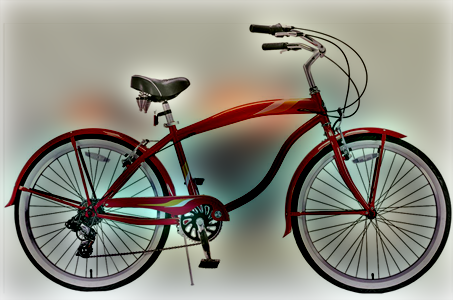

In [ ]:
# Execution
sig_values = [5.0, 10.0, 15.0]

for i in range(len(sig_values)):
  hybrid_img(sig_values[i], '1a_bicycle.bmp', '1b_motorcycle.bmp')

Sig: 5.0 , Low:  2b_marilyn.bmp , High:  2a_einstein.bmp


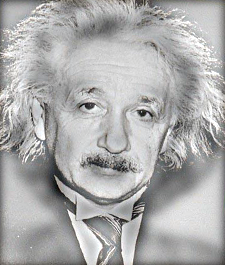

Sig: 10.0 , Low:  2b_marilyn.bmp , High:  2a_einstein.bmp


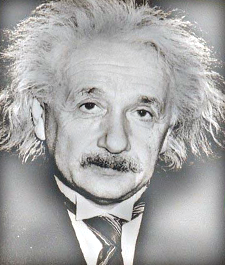

Sig: 15.0 , Low:  2b_marilyn.bmp , High:  2a_einstein.bmp


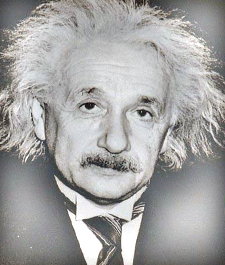

In [ ]:
for i in range(len(sig_values)):
  hybrid_img(sig_values[i], '2a_einstein.bmp', '2b_marilyn.bmp')

Sig: 5.0 , Low:  3b_submarine.bmp , High:  3a_fish.bmp


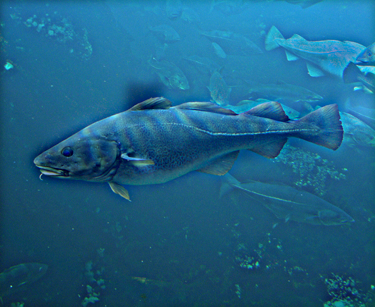

Sig: 10.0 , Low:  3b_submarine.bmp , High:  3a_fish.bmp


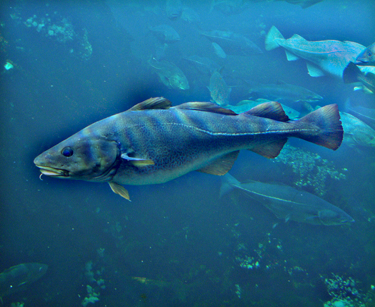

Sig: 15.0 , Low:  3b_submarine.bmp , High:  3a_fish.bmp


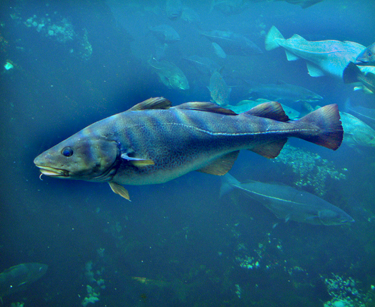

In [ ]:
for i in range(len(sig_values)):
  hybrid_img(sig_values[i], '3a_fish.bmp', '3b_submarine.bmp')

Sig: 5.0 , Low:  4b_plane.bmp , High:  4a_bird.bmp


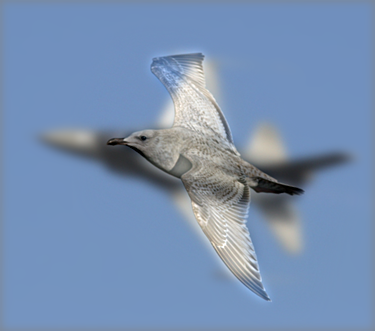

Sig: 10.0 , Low:  4b_plane.bmp , High:  4a_bird.bmp


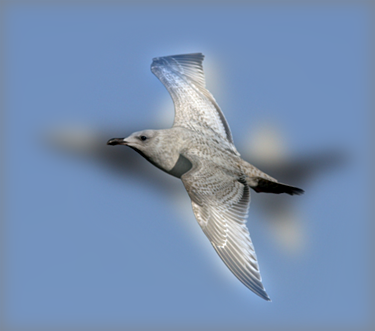

Sig: 15.0 , Low:  4b_plane.bmp , High:  4a_bird.bmp


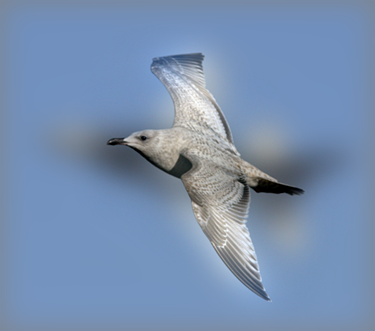

In [ ]:
for i in range(len(sig_values)):
  hybrid_img(sig_values[i], '4a_bird.bmp', '4b_plane.bmp')

Gaussian blur on Gaussian noised box with sigma = 5.0


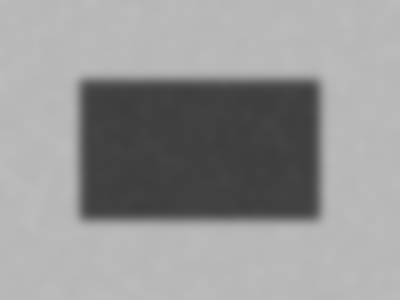

Bilateral Filter on Gaussian noised box with d = 15 , sigmaColor = 80.0 , sigmaSpace = 80.0


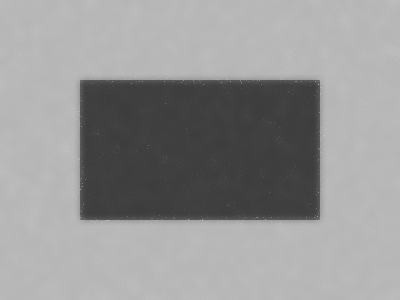

Median Blur on Gaussian noised box with ksize = 9


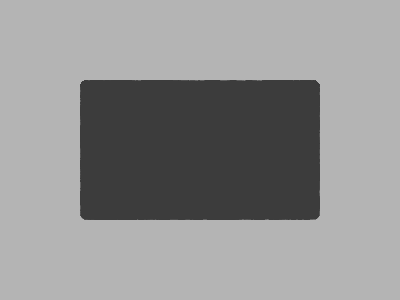

Gaussian blur on Speckle noised box with sigma = 6.0


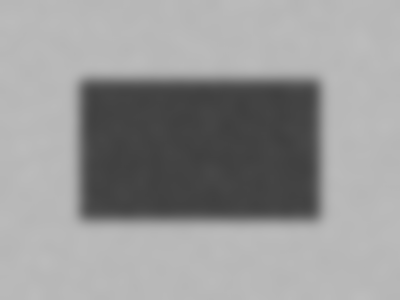

Bilateral Filter on Speckle noised box with d = 15 , sigmaColor = 100.0 , sigmaSpace = 100.0


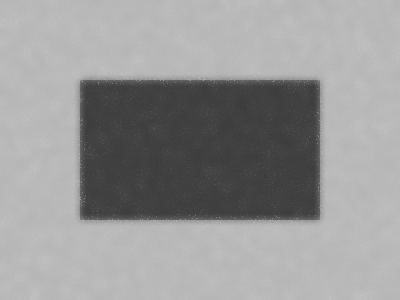

Median Blur on Speckle noised box with ksize = 5


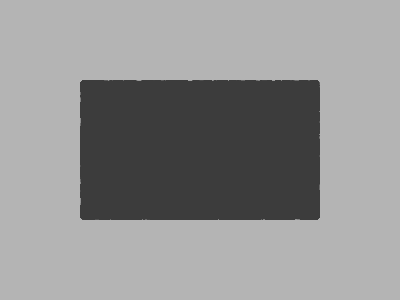

In [ ]:
############################### PART 4 ###############################
# -----------------------------Question 1-----------------------------

# Upload the original images
img_gauss = cv2.imread('box_gauss.png', cv2.IMREAD_UNCHANGED)
img_speckle = cv2.imread('box_speckle.png', cv2.IMREAD_UNCHANGED)

# 1
# Apply Gaussian Blur on Gaussian Noised Box
sig = 5.0
gbox_gfilter = cv2.GaussianBlur(img_gauss, (0,0), sig, sig)
img_gbox_gfilter = Image.fromarray(gbox_gfilter.astype('uint8'))
img_gbox_gfilter.save('gbox_gfilter.png','png')
img_1_gbox_gfilter = Image.open('gbox_gfilter.png')
print('Gaussian blur on Gaussian noised box with sigma =',sig)
display(img_1_gbox_gfilter)

# 2
# Apply Bilateral Filter on Gaussian Noised Box
sigmaColor = 80.0
sigmaSpace = 80.0
d = 15
gbox_bfilter = cv2.bilateralFilter(img_gauss, d, sigmaColor, sigmaSpace)
img_gbox_bfilter = Image.fromarray(gbox_bfilter.astype('uint8'))
img_gbox_bfilter.save('gbox_bfilter.png','png')
img_1_gbox_bfilter = Image.open('gbox_bfilter.png')
print('Bilateral Filter on Gaussian noised box with d =', d, ', sigmaColor =',sigmaColor, ', sigmaSpace =', sigmaSpace)
display(img_1_gbox_bfilter)

# 3
# Apply Median Blur on Gaussian Noised Box
ksize = 9
gbox_mfilter = cv2.medianBlur(img_gauss, ksize)
img_gbox_mfilter = Image.fromarray(gbox_mfilter.astype('uint8'))
img_gbox_mfilter.save('gbox_mfilter.png','png')
img_1_gbox_mfilter = Image.open('gbox_mfilter.png')
print('Median Blur on Gaussian noised box with ksize =',ksize)
display(img_1_gbox_mfilter)


# 4
# Apply Gaussian blur on Speckle noised box
sig = 6.0
sbox_gfilter = cv2.GaussianBlur(img_speckle, (0,0), sig, sig)
img_sbox_gfilter = Image.fromarray(sbox_gfilter.astype('uint8'))
img_sbox_gfilter.save('sbox_gfilter.png','png')
img_1_sbox_gfilter = Image.open('sbox_gfilter.png')
print('Gaussian blur on Speckle noised box with sigma =',sig)
display(img_1_sbox_gfilter)

# 5
# Apply Bilateral Filter on Speckle noised box
sigmaColor = 100.0
sigmaSpace = 100.0
d = 15
sbox_bfilter = cv2.bilateralFilter(img_speckle, d, sigmaColor, sigmaSpace)
img_sbox_bfilter = Image.fromarray(sbox_bfilter.astype('uint8'))
img_sbox_bfilter.save('sbox_bfilter.png','png')
img_1_sbox_bfilter = Image.open('sbox_bfilter.png')
print('Bilateral Filter on Speckle noised box with d =', d, ', sigmaColor =',sigmaColor, ', sigmaSpace =', sigmaSpace)
display(img_1_sbox_bfilter)

# 6
# Apply Median Blur on Speckle Noised Box
ksize = 5
sbox_mfilter = cv2.medianBlur(img_speckle, ksize)
img_sbox_mfilter = Image.fromarray(sbox_mfilter.astype('uint8'))
img_sbox_mfilter.save('sbox_mfilter.png','png')
img_1_sbox_mfilter = Image.open('sbox_mfilter.png')
print('Median Blur on Speckle noised box with ksize =',ksize)
display(img_1_sbox_mfilter)


Gaussian blur on Gaussian noised box with sigma = 50.0


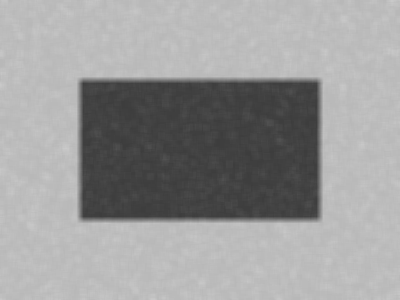

Bilateral Filter on Gaussian noised box with d = 7 , sigmaColor = 150.0 , sigmaSpace = 150.0


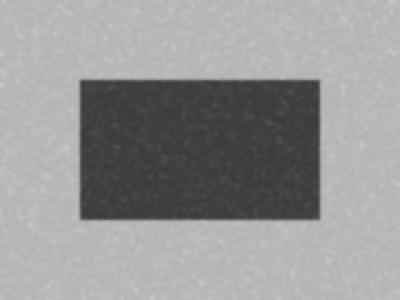

Median Blur on Gaussian noised box with ksize = 7


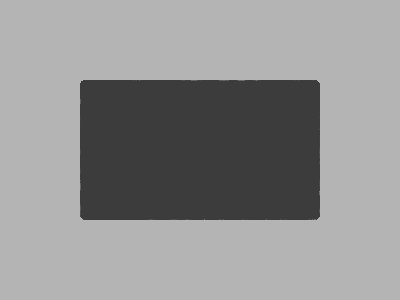

Gaussian blur on Speckle noised box with sigma = 50.0


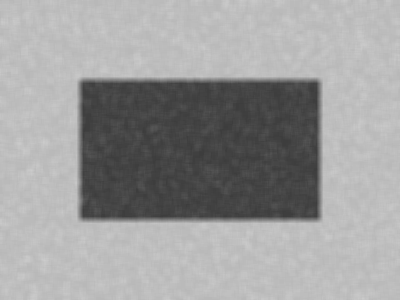

Bilateral Filter on Speckle noised box with d = 7 , sigmaColor = 150.0 , sigmaSpace = 150.0


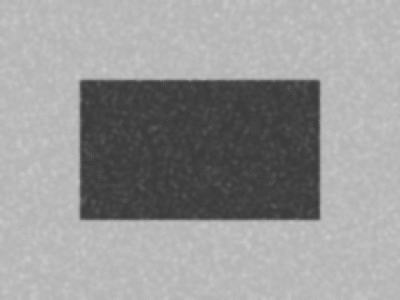

Median Blur on Speckle noised box with ksize = 7


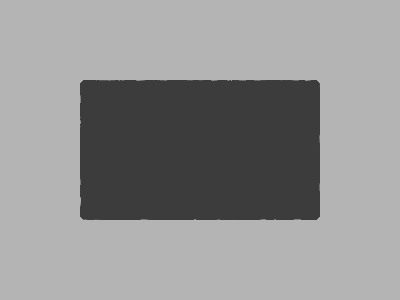

In [ ]:
# -----------------------------Question 2-----------------------------
# 1
# Apply Gaussian Blur on Gaussian Noised Box
sig = 50.0
gbox_gfilter = cv2.GaussianBlur(img_gauss, ksize=(7, 7), sigmaX=sig)
img_gbox_gfilter = Image.fromarray(gbox_gfilter.astype('uint8'))
img_gbox_gfilter.save('gbox_gfilter_2.png','png')
img_2_gbox_gfilter = Image.open('gbox_gfilter_2.png')
print('Gaussian blur on Gaussian noised box with sigma =',sig)
display(img_2_gbox_gfilter)

# 2
# Apply Bilateral Filter on Gaussian Noised Box
sigmaColor = 150.0
sigmaSpace = 150.0
d = 7
gbox_bfilter = cv2.bilateralFilter(img_gauss, d, sigmaColor, sigmaSpace)
img_gbox_bfilter = Image.fromarray(gbox_bfilter.astype('uint8'))
img_gbox_bfilter.save('gbox_bfilter_2.png','png')
img_2_gbox_bfilter = Image.open('gbox_bfilter_2.png')
print('Bilateral Filter on Gaussian noised box with d =', d, ', sigmaColor =',sigmaColor, ', sigmaSpace =', sigmaSpace)
display(img_2_gbox_bfilter)

# 3
# Apply Median Blur on Gaussian Noised Box
ksize = 7
gbox_mfilter = cv2.medianBlur(img_gauss, ksize)
img_gbox_mfilter = Image.fromarray(gbox_mfilter.astype('uint8'))
img_gbox_mfilter.save('gbox_mfilter_2.png','png')
img_2_gbox_mfilter = Image.open('gbox_mfilter_2.png')
print('Median Blur on Gaussian noised box with ksize =',ksize)
display(img_2_gbox_mfilter)


# 4
# Apply Gaussian blur on Speckle noised box
sig = 50.0
sbox_gfilter = cv2.GaussianBlur(img_speckle, ksize=(7, 7), sigmaX=sig)
img_sbox_gfilter = Image.fromarray(sbox_gfilter.astype('uint8'))
img_sbox_gfilter.save('sbox_gfilter_2.png','png')
img_2_sbox_gfilter = Image.open('sbox_gfilter_2.png')
print('Gaussian blur on Speckle noised box with sigma =',sig)
display(img_2_sbox_gfilter)

# 5
# Apply Bilateral Filter on Speckle noised box
sigmaColor = 150.0
sigmaSpace = 150.0
d = 7
sbox_bfilter = cv2.bilateralFilter(img_speckle, d, sigmaColor, sigmaSpace)
img_sbox_bfilter = Image.fromarray(sbox_bfilter.astype('uint8'))
img_sbox_bfilter.save('sbox_bfilter_2.png','png')
img_2_sbox_bfilter = Image.open('sbox_bfilter_2.png')
print('Bilateral Filter on Speckle noised box with d =', d, ', sigmaColor =',sigmaColor, ', sigmaSpace =', sigmaSpace)
display(img_2_sbox_bfilter)

# 6
# Apply Median Blur on Speckle Noised Box
ksize = 7
sbox_mfilter = cv2.medianBlur(img_speckle, ksize)
img_sbox_mfilter = Image.fromarray(sbox_mfilter.astype('uint8'))
img_sbox_mfilter.save('sbox_mfilter_2.png','png')
img_2_sbox_mfilter = Image.open('sbox_mfilter_2.png')
print('Median Blur on Speckle noised box with ksize =',ksize)
display(img_2_sbox_mfilter)



*   Gaussian filter can remove some of the noise by using its blurring feature. It generates the weights depend on spatial distance from the center pixel. However, it also blurs the boundaries of the image. So, we couldn't get a very clear result.
*   Bilateral filter also did a good job while smoothing the picture. Also, it was better than the Gaussian filter because it preserved the edges. Since bilateral filter considers both spatial distance and range distance, it has edge-preserving properties. However, it is slower than the Gaussian filter.
*   Median filter also could smoothen the picture nicely. It also preserved the edges because it is checking the neighborhood values, and if a pixel is an edge, then probably its neighbors will be the edges as well. Maybe the only negative side is the efficiency. It can be slower than Gaussian.




